<a href="https://colab.research.google.com/github/akumarpandey686/ML-Project/blob/master/brain_tumoy_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install -q keras

In [3]:
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import random as rn
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(123)
rn.seed(1234)
tf.random.set_random_seed(1)

In [0]:
image_size = [224,224]
data_path = '/content/drive/My Drive/Colab Notebooks/data1'

In [8]:
data_path

'/content/drive/My Drive/Colab Notebooks/data1'

In [9]:
vgg = VGG16(input_shape= image_size+[3],weights='imagenet',include_top=False)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
58892288/58889256 [==============================] - 6s 0us/step


In [10]:
vgg.output

<tf.Tensor 'block5_pool/MaxPool:0' shape=(?, 7, 7, 512) dtype=float32>

In [0]:
x = vgg.output
x = GlobalAveragePooling2D()(x)

In [0]:

x = Dense(1024,activation='relu')(x)
x = Dense(1024,activation='relu')(x)
x = Dense(512, activation='relu')(x)

In [0]:
preds = Dense(2,activation='softmax')(x)

In [0]:
model = Model(inputs = vgg.input,outputs=preds)

In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
for layer in vgg.layers:
    layer.trainable = False

In [17]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies
train_generator=train_datagen.flow_from_directory(data_path,target_size=(224,224),color_mode='rgb',batch_size=32,class_mode='categorical',shuffle=True)

Found 253 images belonging to 2 classes.


In [0]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
print(train_generator.n)
print(train_generator.batch_size)
print(253//32)

253
32
7


In [20]:
step_size_train=train_generator.n//train_generator.batch_size
r = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=5)

Epoch 1/5
7/7 [==============================] - 126s 18s/step - loss: 2.5060 - acc: 0.6295
Epoch 2/5
7/7 [==============================] - 109s 16s/step - loss: 0.4496 - acc: 0.8073
Epoch 3/5
7/7 [==============================] - 112s 16s/step - loss: 0.2573 - acc: 0.8973
Epoch 4/5
7/7 [==============================] - 110s 16s/step - loss: 0.1275 - acc: 0.9638
Epoch 5/5
7/7 [==============================] - 110s 16s/step - loss: 0.0768 - acc: 0.9729


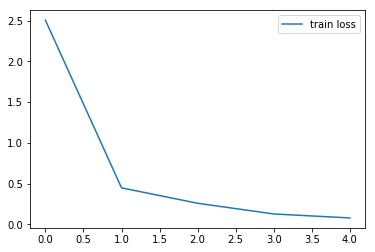

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
# plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
# plt.plot(r.history['acc'], label='train acc')
# plt.plot(r.history['val_acc'], label='val acc')
# plt.legend()
# plt.show()
# plt.savefig('AccVal_acc')

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('brain_tumor.h5')

In [0]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

In [25]:
model = load_model('brain_tumor.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
img_path = '/content/drive/My Drive/Colab Notebooks/data1/no/28 no.jpg'

In [0]:
img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)

In [50]:
rslt = model.predict(img_data)
print(rslt)

[[0.863967   0.13603306]]


In [51]:
if rslt[0][0] == 1:
  prediction = 'Not a Brain tumor'
else:
  prediction = 'Brain tumor'

print(prediction)

Brain tumor
